## Домашнее задание
1. Прочитать про методы оптимизации для нейронных сетей https://habr.com/post/318970/
2. Реализовать самостоятельно логистическую регрессию
3. Обучить ее методом градиентного спуска
4. Методом nesterov momentum
5. Методом rmsprop

В качестве dataset'а взять Iris, оставив 2 класса:
Iris Versicolor
Iris Virginica

In [16]:
from sklearn import datasets

import pandas as pd

In [4]:
iris = datasets.load_iris()

In [8]:
for key in iris.keys():
    print( key )

data
target
target_names
DESCR
feature_names


In [45]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

нам надо оставить только versicolor и virginica, они начинаются с 50-го элемента

In [38]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [39]:
y = iris.target[50:]

In [40]:
X = iris.data[50:]

In [41]:
import numpy as np
import matplotlib.pyplot as plt

Text(0,0.5,'Sepal width')

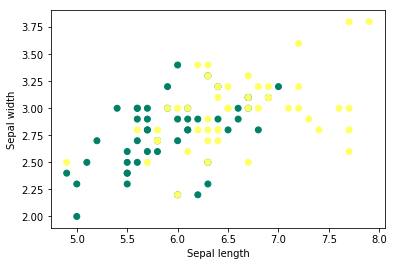

In [58]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.summer)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

Text(0,0.5,'petal width')

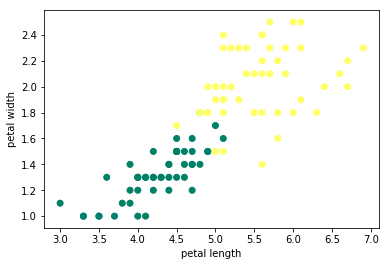

In [66]:
plt.scatter(X[:, 2], X[:, 3], c=y, cmap=plt.cm.summer)
plt.xlabel('petal length')
plt.ylabel('petal width')

2. Реализовать самостоятельно логистическую регрессию

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
model = LogisticRegression()

In [61]:
model.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [80]:
y_pred = model.predict_proba(X)[:,1]

In [83]:
len(y_pred)

100

In [64]:
model.score(X,y)

0.97

In [65]:
# обучили логистическую модель, которая подсказывает, что для классификации важны размеры лепестков.
model.coef_

array([[-1.70690955, -1.53277945,  2.46921149,  2.5563083 ]])

3. Обучить ее методом градиентного спуска

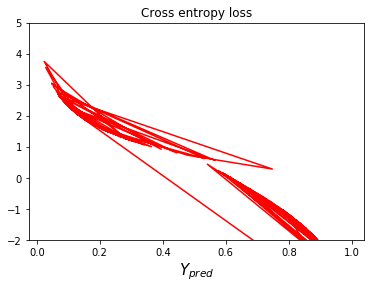

In [81]:
x_entropy_loss = - (y * np.log(y_pred)) - ((1. - y) * np.log(1. - y_pred))
#ploting the predicted values against the cross entropy loss
plt.plot(y_pred, x_entropy_loss, 'r-' )
plt.title('Cross entropy loss')
plt.xlabel('$Y_{pred}$', fontsize=15)
plt.ylim(-2, 5)
plt.show()

In [84]:
x_entropy_loss

array([ 2.93915242,  2.21450077,  1.96272426,  1.26186014,  1.62805691,
        1.17259815,  1.56621731,  2.62840832,  2.34545382,  1.32890192,
        1.79824319,  1.85057218,  2.4832364 ,  1.23316039,  3.05530121,
        3.01071427,  0.92912981,  2.64761261,  0.81179246,  2.27312183,
        0.57059267,  2.7833635 ,  0.62910657,  1.499382  ,  2.71278227,
        2.70541573,  1.85374784,  1.01089482,  1.28147363,  3.75538703,
        2.2042891 ,  2.66228127,  2.63143692,  0.29048312,  0.73675385,
        1.67452945,  2.09512051,  1.54639282,  2.06179682,  1.49072267,
        1.07451754,  1.53232535,  2.2660454 ,  2.64457433,  1.47788878,
        2.22008203,  1.86458324,  2.39804031,  3.56205977,  1.94427729,
       -4.16347959, -2.0902191 , -1.87703763, -1.88950571, -2.98950858,
       -2.82384353, -1.9241281 , -1.91355467, -2.35522465, -2.3451395 ,
       -0.0123203 , -1.4922206 , -1.33155654, -2.61547896, -3.28511192,
       -1.78495155, -1.02628454, -1.85534694, -4.56270892, -1.12